In [1]:
#imposrting necessary modules
import networkx as nx
import os
import matplotlib.pyplot as plt
from queue import Queue
import queue as Q
from collections import defaultdict

In [2]:
class GreedyBFS:
    
    def __init__(self):
        self.visited = []#explored nodes
        self.steps = {} #from origin how many steps have been taken
        self.queue = Queue()#nodes to be expanded
        self.q = Q.PriorityQueue()#helper data structure to pick next node to be visited
    
    #GBFS function
    def GBFS (self, graph, start_node, goal_node):
        
        for node in graph.nodes.keys():
            self.steps[node] = -1
            
        
        self.visited.append(start_node)
        self.steps[start_node] = 0
        
        self.queue.put(start_node)
        
        while not self.queue.empty():
            current_node = self.queue.get()
            
            for neighbor in list(graph[current_node]):
                if neighbor not in self.visited:
                    self.q.put((graph.node[neighbor]["heuristic"], neighbor))
                
            next_node = self.q.get()[1]
            self.visited.append(next_node)
            self.steps[next_node] = self.steps[current_node] + 1
                
            if next_node == goal_node:
                break
            self.queue.put(next_node)
        

UCS class

In [20]:
class uniform_cost_algorithm:
    
        def __init__(self):
            self.visited = []#explored nodes
            self.costs = 0 #distance covered at each node
            #self.queue = Queue()#nodes to be expanded
            self.queue = Q.PriorityQueue()
            
        def UCS(self, graph, start_node, goal_node):
            
            self.queue.put((0, start_node))
            
            while self.queue:
                cost, current_node = self.queue.get()
                
                if current_node not in self.visited:
                    
                    self.visited.append(current_node)
                    
                    if current_node == goal_node:
                        return
                    
                    for neighbor in list(graph[current_node]):
                        if neighbor not in self.visited:
                            total_cost = cost + graph.edges[current_node, neighbor]["weight"]
                            self.queue.put((total_cost, neighbor))
                self.costs = cost

Initializing network.
All network nodes:
    SportsComplex
    Siwaka
    Ph.1A
    Ph.1B
    STC
    Phase2
    Phase3
    J1
    ParkingLot
    Mada

In [5]:
G = nx.Graph()

In [6]:
nodes = ["SportsComplex", "Siwaka", "Ph.1A", "Ph.1B", "STC", "Phase2", "Phase3", "J1", "ParkingLot", "Mada"]
G.add_nodes_from(nodes)
G.nodes()

NodeView(('SportsComplex', 'Siwaka', 'Ph.1A', 'Ph.1B', 'STC', 'Phase2', 'Phase3', 'J1', 'ParkingLot', 'Mada'))

add edges + weights + labels

In [7]:
G.add_edge("SportsComplex", "Siwaka", weight = 450, label = "UnkRoad")
G.add_edge("Siwaka", "Ph.1A", weight = 10, label = "SangaleRd")
G.add_edge("Siwaka", "Ph.1B", weight = 230, label = "SangaleLink")
G.add_edge("Ph.1A", "Ph.1B", weight = 100, label = "ParkingWalkWay")
G.add_edge("Ph.1A", "Mada", weight = 850, label = "SangaleRd")
G.add_edge("Ph.1B", "Phase2", weight = 112, label = "KeriRd")
G.add_edge("Ph.1B", "STC", weight = 50, label = "KeriRd")
G.add_edge("STC", "Phase2", weight = 50, label = "STCwalkway")
G.add_edge("STC", "ParkingLot", weight = 250, label = "LibraryWalkWay")
G.add_edge("Phase2", "Phase3", weight = 500, label = "KeriRd")
G.add_edge("Phase3", "ParkingLot", weight = 350, label = "HimaGardensRd")
G.add_edge("Phase2", "J1", weight = 600, label = "KeriRd")
G.add_edge("J1", "Mada", weight = 200, label = "SangaleRd")
G.add_edge("ParkingLot", "Mada", weight = 700, label = "LangataRd")

In [8]:
G.nodes["SportsComplex"]['pos']=(-12,2)
G.node["Siwaka"]['pos']=(-1,2)
G.nodes["Ph.1A"]['pos']=(8,2)
G.node["Ph.1B"]['pos']=(8,0)
G.node["STC"]['pos']=(8,-1)
G.node["Phase2"]['pos']=(12,0)
G.node["J1"]['pos']=(18,0)
G.node["Phase3"]['pos']=(18,-1)
G.node["ParkingLot"]['pos']=(18,-2)
G.node["Mada"]['pos']=(24,0)

In [9]:
G.edges["SportsComplex", "Siwaka"]['weight']

450

In [10]:
node_pos = nx.get_node_attributes(G, 'pos')

In [11]:
def addHeuristics():
    heuristics = {
        "SportsComplex" : 730,
        "Siwaka" : 430,
        "Ph.1A" : 380,
        "Ph.1B" : 280,
        "STC" : 213,
        "Phase2" : 210,
        "J1" : 500,
        "Phase3" : 160,
        "Mada" : 630,
        "ParkingLot" : 0
    }
    
    for node in list(G):
        G.node[node]["heuristic"] = heuristics[node]

In [12]:
addHeuristics()

In [13]:
gbfsTraverser = GreedyBFS()
gbfsTraverser.GBFS(G, "SportsComplex", "ParkingLot")

final_path = gbfsTraverser.visited
final_path


['SportsComplex', 'Siwaka', 'Ph.1B', 'Phase2', 'Phase3', 'ParkingLot']

C:\Users\user\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\user\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \


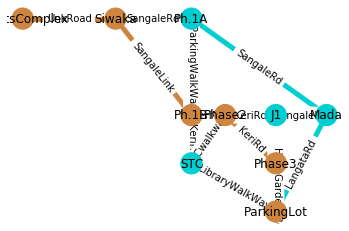

In [14]:
node_col = ['darkturquoise' if not node in final_path else 'peru' for node in G.nodes()]
peru_colored_edges = list(zip(final_path,final_path[1:]))
edge_col = ['darkturquoise' if not edge in peru_colored_edges else 'peru' for edge in G.edges()]
arc_label=nx.get_edge_attributes(G,'label')
nx.draw_networkx(G, node_pos,node_color= node_col, node_size=450)
nx.draw_networkx_edges(G, node_pos,width=5,edge_color= edge_col)
nx.draw_networkx_edge_labels(G, node_pos, edge_labels=arc_label)
plt.axis('off')
plt.show()

UCS Algotithm in Action


In [28]:
ucsTraverser = uniform_cost_algorithm()
ucsTraverser.UCS(G, "SportsComplex", "ParkingLot")

ucs_path = ucsTraverser.visited
ucs_path

['SportsComplex', 'Siwaka', 'Ph.1A', 'Ph.1B', 'STC', 'Phase2', 'ParkingLot']

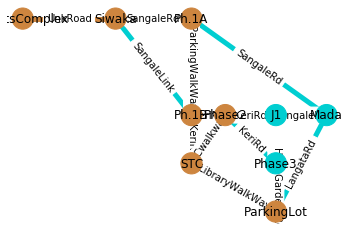

In [29]:
node_col = ['darkturquoise' if not node in ucs_path else 'peru' for node in G.nodes()]
peru_colored_edges = list(zip(ucs_path,ucs_path[1:]))
edge_col = ['darkturquoise' if not edge in peru_colored_edges else 'peru' for edge in G.edges()]
arc_label=nx.get_edge_attributes(G,'label')
nx.draw_networkx(G, node_pos,node_color= node_col, node_size=450)
nx.draw_networkx_edges(G, node_pos,width=5,edge_color= edge_col)
nx.draw_networkx_edge_labels(G, node_pos, edge_labels=arc_label)
plt.axis('off')
plt.show()

In [26]:
qt = Q.PriorityQueue()
qt.put((0, "Siwaka"))
qt.put((1, "Siwaka"))
qt.get()

(0, 'Siwaka')

In [27]:
qt.get()

(1, 'Siwaka')